### Objective
The objective of this python notebook is to use MLP regression to predict monthly crude palm oil prices.



#### Data
The dataset is available at the following links:https://www.indexmundi.com/commodities/?commodity=palm-oil&months=300.

#### Mount Google Drive to Google Colab Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Use pip to install required packages: sklearn

In [ ]:
!pip install sklearn

#### Import the required libraries

In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#### Load the dataset using the following code:

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Univariate Crude Palm Oil Price Prediction/Data/crude_palmoil_price.csv",usecols=[1])

In [ ]:
data.head()

,cpo_pri
0,281
1,272
2,279
3,291
4,284


Text(0, 0.5, 'cpo_pri')

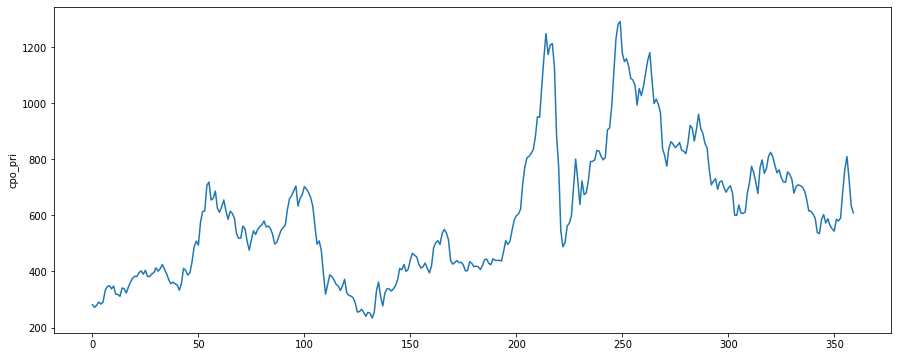

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(data)
plt.ylabel('cpo_pri')

#### Split the dataset into test and train sets.

In [ ]:
train_size = int(data.shape[0] * 0.67)
train_df, test_df = data.iloc[:train_size, :], data.iloc[train_size:, :]

#### Convert an array of values into a dataset matrix

In [ ]:
def create_data(data, look_back=1):
    m = len(data)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(data[i - look_back: i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [ ]:
look_back = 3
X_train, y_train = create_data(train_df.values, look_back=look_back)
X_test, y_test = create_data(test_df.values, look_back=look_back)

In [ ]:
for i in range(5):
    print(X_train[i], y_train[i])

[281 272 279] 291
[272 279 291] 284
[279 291 284] 290
[291 284 290] 331
[284 290 331] 346


#### Build and train the model on our train dataset:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#### Set the hyper-parameters needed to build the model

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))

#### Build the model and build, compile, and train the model:

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
119/119 - 0s - loss: 687213.9375
Epoch 2/400
119/119 - 0s - loss: 210978.3125
Epoch 3/400
119/119 - 0s - loss: 24001.8086
Epoch 4/400
119/119 - 0s - loss: 3516.0137
Epoch 5/400
119/119 - 0s - loss: 3147.4329
Epoch 6/400
119/119 - 0s - loss: 2903.4385
Epoch 7/400
119/119 - 0s - loss: 2999.2554
Epoch 8/400
119/119 - 0s - loss: 2866.4592
Epoch 9/400
119/119 - 0s - loss: 2790.0757
Epoch 10/400
119/119 - 0s - loss: 2648.5513
Epoch 11/400
119/119 - 0s - loss: 2514.7783
Epoch 12/400
119/119 - 0s - loss: 2620.7583
Epoch 13/400
119/119 - 0s - loss: 2596.6995
Epoch 14/400
119/119 - 0s - loss: 2668.5449
Epoch 15/400
119/119 - 0s - loss: 2543.3735
Epoch 16/400
119/119 - 0s - loss: 2517.8503
Epoch 17/400
119/119 - 0s - loss: 2481.5439
Epoch 18/400
119/119 - 0s - loss: 2419.8135
Epoch 19/400
119/119 - 0s - loss: 2289.3193
Epoch 20/400
119/119 - 0s - loss: 2354.8992
Epoch 21/400
119/119 - 0s - loss: 2486.1355
Epoch 22/400
119/119 - 0s - loss: 2276.9133
Epoch 23/400
119/119 - 0s - loss: 22

#### Evaluate the model and print the Mean Square Error (MSE) and the Root Mean Square Error (RMSE):

In [ ]:
score = model.evaluate(X_test, y_test)
print('\nTest mse:', score)
print('Test rmse:', math.sqrt(score))

4/4 [==============================] - 0s 3ms/step - loss: 2382.9709

Test mse: 2382.970947265625
Test rmse: 48.81568341491928


#### Predict the values using the MLP model and plot them, both for test and train datasets:

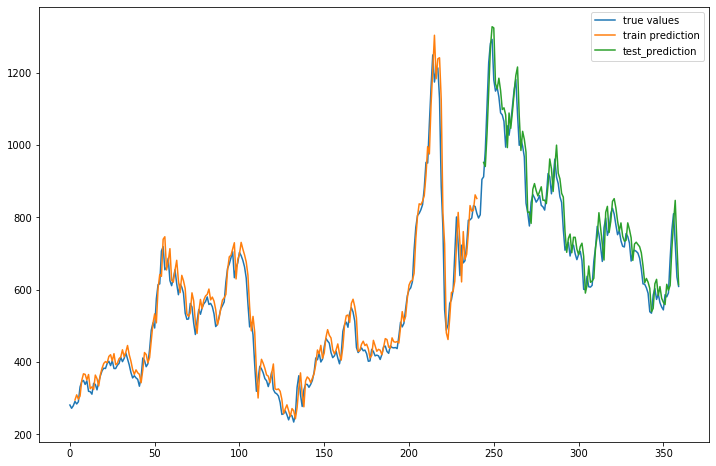

In [ ]:
plt.figure(figsize=(12, 8))
train_prediction = model.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(data))
plt.plot(data, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();

In [ ]:
Use ARIMA to predict Monthly crude palm oil prices. The data for this project were retrieved from index mundi:https://www.indexmundi.com/commodities/?commodity=palm-oil&months=300 for the periods 1984 and 2021

In [ ]:
Crude PalmOil Price Prediction using MLP Regression